<a href="https://colab.research.google.com/github/nanditaraha/IIT-NEET-Physics/blob/main/projectile_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

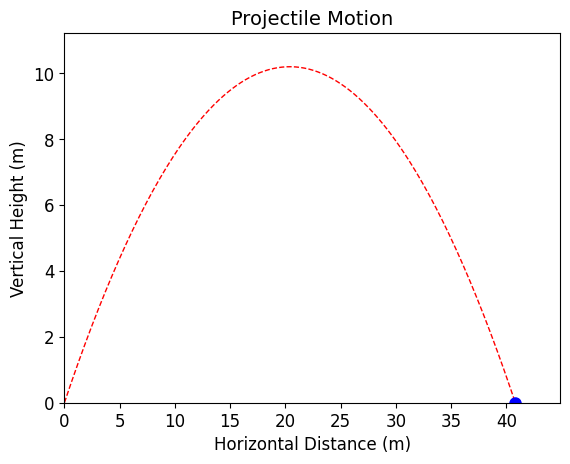

In [1]:
# Step 1: Install ffmpeg
!apt-get install ffmpeg -y

# Step 2: Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Step 3: Projectile motion function
def projectile_motion(v0, angle_deg, g=9.8):
    angle = np.radians(angle_deg)
    t_flight = 2 * v0 * np.sin(angle) / g
    t = np.linspace(0, t_flight, num=200)
    x = v0 * np.cos(angle) * t
    y = v0 * np.sin(angle) * t - 0.5 * g * t**2
    return x, y

# Step 4: Data
v0 = 20   # m/s
angle_deg = 45
x, y = projectile_motion(v0, angle_deg)

# Step 5: Set up animation
fig, ax = plt.subplots()
ax.set_xlim(0, max(x) * 1.1)
ax.set_ylim(0, max(y) * 1.1)

# Add axis labels/tick sizes
ax.set_xlabel("Horizontal Distance (m)", fontsize=12)
ax.set_ylabel("Vertical Height (m)", fontsize=12)
ax.set_title("Projectile Motion", fontsize=14)
ax.tick_params(axis='x', labelsize=12)   # X-axis ticks
ax.tick_params(axis='y', labelsize=12)   # Y-axis ticks

# Trail and moving point
trail, = ax.plot([], [], 'r--', lw=1)     # Path so far
point, = ax.plot([], [], 'bo', markersize=8)  # Current position

def init():
    trail.set_data([], [])
    point.set_data([], [])
    return trail, point

def update(frame):
    # Trail: all points up to current frame
    trail.set_data(x[:frame+1], y[:frame+1])
    # Current projectile point
    point.set_data([x[frame]], [y[frame]])
    return trail, point

ani = FuncAnimation(fig, update, frames=len(x), init_func=init, blit=True)

# Step 6: Save as MP4
ani.save('/content/projectile_motion_trail.mp4', writer='ffmpeg', fps=20)

# Step 7: Download MP4
from google.colab import files
files.download('/content/projectile_motion_trail.mp4')
